# Modelos lineales con SAS

Los datos utilizados en este ejemplo son los siguientes

* [Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Modelo ANOVA

Primero se realizará una exploración de los datos.


In [1]:
LIBNAME personal "/home/vazquez.francisco0/my_shared_file_links/vazquez.francisco0";

PROC CONTENTS data=personal.studentsperf varnum short;
RUN;

PROC MEANS DATA = personal.studentsperf MEAN STD;
CLASS test_preparation_course;
VAR math_score;
RUN;

Para ajustar un modelo ANOVA, se puede usar el procedimiento GLM debido a que es un diseño desbalanceado.


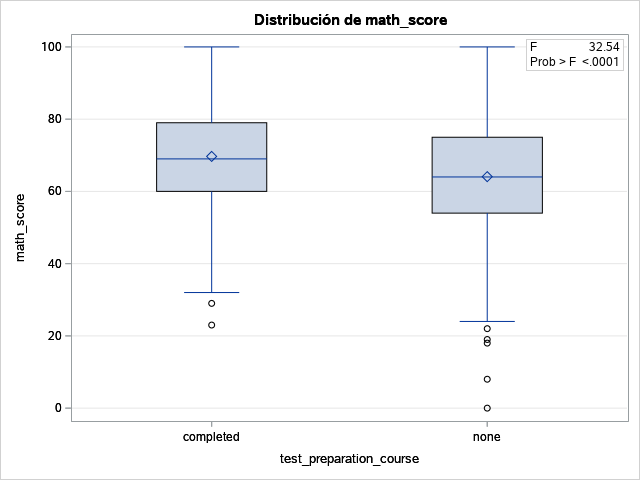

In [2]:
PROC GLM DATA = personal.studentsperf;
CLASS test_preparation_course ;
MODEL math_score = test_preparation_course;
STORE OUT= mod1 / LABEL = "ANOVA 1 vía";
RUN;

Para hacer predicciones, se realiza con el procedimiento PLM.


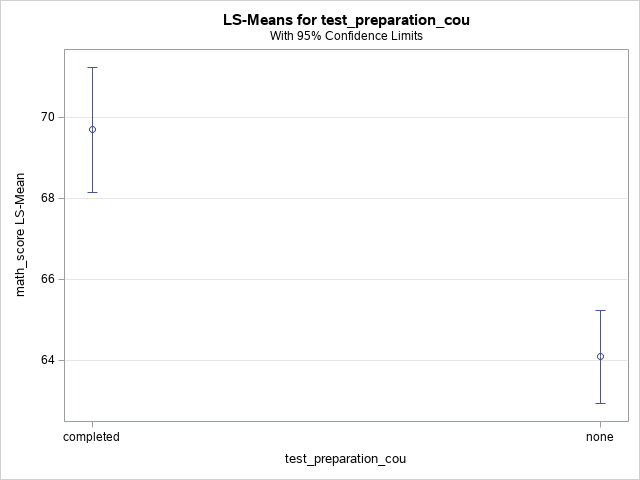

In [3]:
DATA NDATA;
ATTRIB test_preparation_course LENGTH = $10; 
INPUT test_preparation_course $;
DATALINES;
completed
none
;
RUN;

PROC PLM RESTORE = mod1;
SCORE DATA = NDATA OUT = PRED PREDICTED STDERR LCL UCL LCLM UCLM;
LSMEANS test_preparation_course / CL ;
RUN;

PROC PRINT DATA = PRED;
RUN;